In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

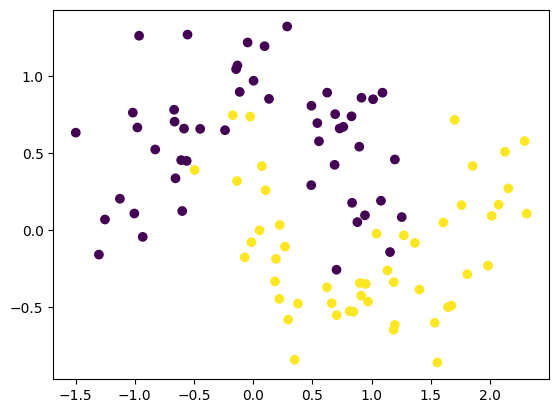

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


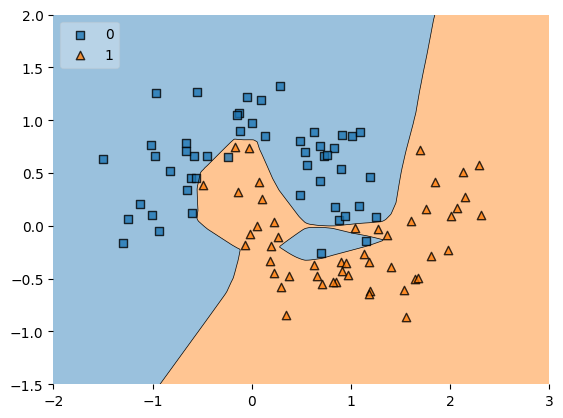

In [7]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

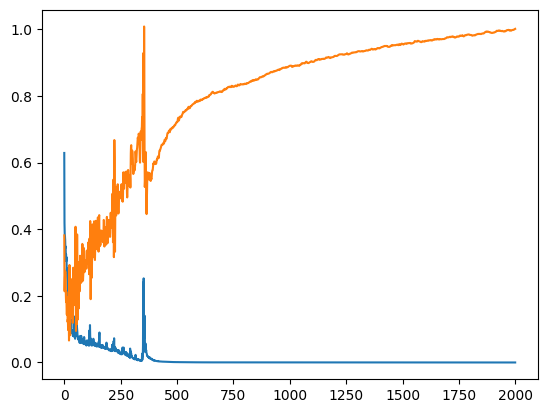

In [8]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [9]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


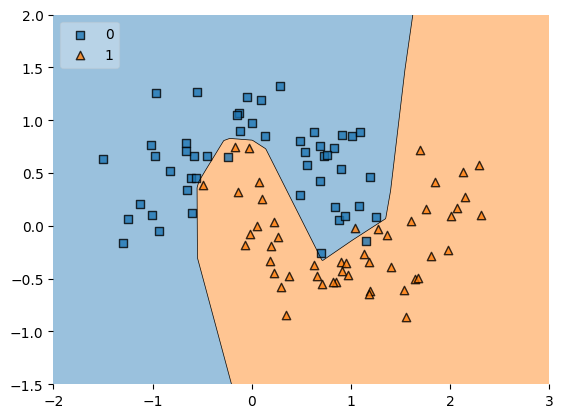

In [11]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

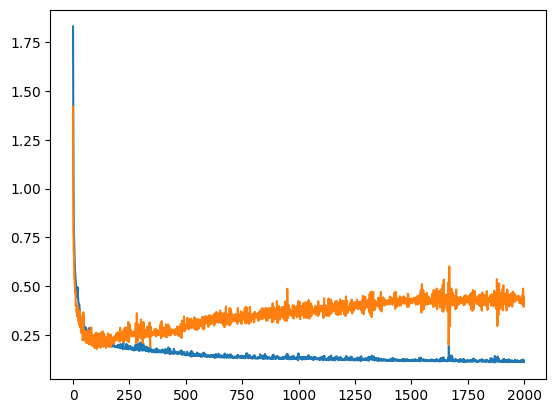

In [12]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [13]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

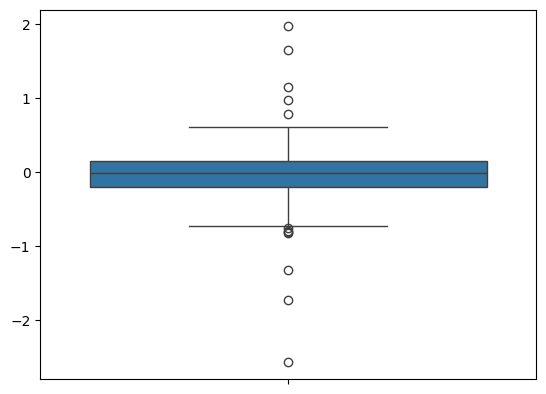

In [14]:
sns.boxplot(model1_weight_layer1)

<Axes: >

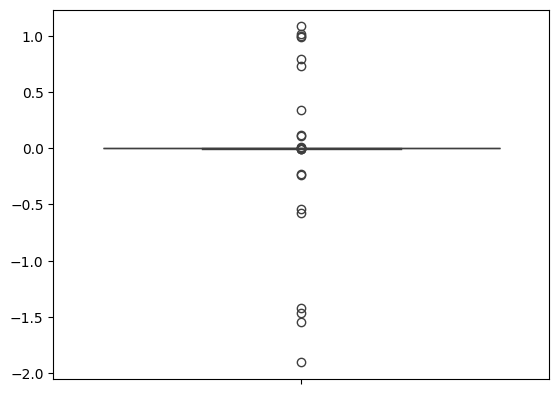

In [15]:
sns.boxplot(model2_weight_layer1)

In [16]:
model1_weight_layer1.min()

np.float32(-2.5667243)

In [17]:
model2_weight_layer1.min()

np.float32(-1.9040174)

/tmp/ipython-input-2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
/tmp/ipython-input-2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

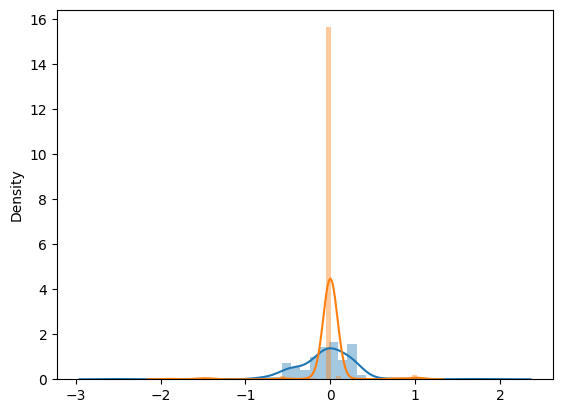

In [18]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [19]:
model1.get_weights()[0].reshape(256)

array([-4.81512874e-01, -1.58857793e-01, -4.28414494e-01,  1.31671736e-02,
       -1.76286638e-01, -2.47453660e-01, -8.97442400e-02, -3.95156115e-01,
        2.40172789e-01, -4.49476451e-01, -4.68734711e-01, -4.78689045e-01,
        1.45350531e-01, -4.28634673e-01,  4.81472872e-02, -5.43911099e-01,
        4.52746116e-02,  9.93532166e-02, -1.92286178e-01, -2.50105441e-01,
       -7.50069678e-01, -3.48897427e-01, -2.56462067e-01,  2.59877801e-01,
       -5.07851362e-01, -6.51972532e-01, -5.95068097e-01, -3.59715670e-01,
       -3.50250959e-01,  2.49079451e-01, -4.82585579e-01,  2.22710609e-01,
        5.38788782e-03, -1.92473173e-01, -4.69610721e-01, -2.09955141e-01,
        4.90147658e-02,  9.12449381e-04,  2.50208497e-01,  8.54071975e-02,
        7.25330412e-02,  2.29412302e-01, -4.82135683e-01,  1.28999278e-01,
       -8.09823498e-02, -1.46512270e-01, -4.27866548e-01,  1.49803996e-01,
       -4.10123199e-01,  3.05083275e-01, -1.63957357e-01,  2.57072479e-01,
        3.38232875e-01,  